# 新型コロナウィルス感染症(CoVid-19)拡大状況を可視化・分析してみる（世界編）

# モジュールのインポートとデータの読み込み
まずは必要なモジュールをインポートする．

In [38]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime as dt
%pip install japanize-matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 世界のCoVid-19感染状況を可視化する
各国の CoVid-19 感染状況をインタラクティブに可視化したサイトとしては，下記のようなものがある：
- [CoVid19 Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) | [the Center for Systems Science and Engineering (CSSE) at Johns Hopkins Univ](https://systems.jhu.edu).
- [COVID19 Projections](https://covid19.healthdata.org/united-states-of-america) | [The Institute for Health Metrics and Evaluation (IHME) at Washington Univ.](http://www.healthdata.org)
- [Coronavirus Pandemic (COVID-19) | Our World in Data](https://ourworldindata.org/coronavirus)
- [COVID-19-Pandemic | ECDC](https://www.ecdc.europa.eu/en/covid-19-pandemic)
- [Coronavirus pandemic: Tracking the global outbreak](https://www.bbc.com/news/world-51235105) | [BBC](https://www.bbc.com)
- [Cases in the U.S.](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html) | [CDC](https://www.cdc.gov/coronavirus/2019-ncov/index.html)
- [Dashboard](https://covid19.who.int) | [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
- [COVID-19 CORONAVIRUS PANDEMIC | Worldmeter](https://www.worldometers.info/coronavirus/)
― [Rt Live](https://rt.live) | [Kevin Systrom](https://twitter.com/kevin)

## 各国の感染状況データの取得
各国の感染状況データを整理したサイトとしては，下記のようなものがある：
1. [CSSE](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)
2. [ECDC](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)
3.  [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data)

今回は，最後の Our World in Data が公開している下記のデータを用いることにしよう：
https://covid.ourworldindata.org/data/owid-covid-data.csv

まずは `read_csv` 関数を用いてCSVをデータフレームに読み込む．このデータは，`date`の列が日付を表しているので，`datatime`型に置き換えたら，国名と日付の2つを使ってマルチインデックス化しておくと便利だ（このあたりは，詳細に踏み込みたくなければ**おまじない**だと思っておけばいい）．

In [39]:
# CSVをデータフレームに読み込む（ちょっと重い）
global_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# 年-月-日の文字列で記載されている年月日を datetime 型に変更
global_df["date"]=pd.to_datetime(global_df["date"], format="%Y-%m-%d")
# 県別でも扱ったマルチインデックスとして整形
global_df = global_df.set_index(["location", "date"])
global_df # global_df の概観を表示

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          5.0        5.0   
            2020-02-25      AFG      Asia          5.0        0.0   
            2020-02-26      AFG      Asia          5.0        0.0   
            2020-02-27      AFG      Asia          5.0        0.0   
            2020-02-28      AFG      Asia          5.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2022-07-07      ZWE    Africa     255805.0        0.0   
            2022-07-08      ZWE    Africa     255891.0       86.0   
            2022-07-09      ZWE    Africa     255924.0       33.0   
            2022-07-10      ZWE    Africa     255939.0       15.0   
            2022-07-11      ZWE    Africa     255953.0       14.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2022-07-07              31.286        5560.0         0.0   
            2022-07-08              43.571        5562.0         2.0   
            2022-07-09              48.286        5563.0         1.0   
            2022-07-10              50.429        5564.0         1.0   
            2022-07-11              32.429        5565.0         1.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.125   
            2020-02-25                  NaN                    0.125   
            2020-02-26                  NaN                    0.125   
            2020-02-27                  NaN                    0.125   
            2020-02-28                  NaN                    0.125   
...                                     ...                      ...   
Zimbabwe    2022-07-07                0.714                15994.286   
            2022-07-08                1.000                15999.663   
            2022-07-09                1.143                16001.727   
            2022-07-10                1.286                16002.665   
            2022-07-11                1.000                16003.540   

                        new_cases_per_million  ...  female_smokers  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.125  ...             NaN   
            2020-02-25                  0.000  ...             NaN   
            2020-02-26                  0.000  ...             NaN   
            2020-02-27                  0.000  ...             NaN   
            2020-02-28                  0.000  ...             NaN   
...                                       ...  ...             ...   
Zimbabwe    2022-07-07                  0.000  ...             1.6   
            2022-07-08                  5.377  ...             1.6   
            2022-07-09                  2.063  ...             1.6   
            2022-07-10                  0.938  ...             1.6   
            2022-07-11                  0.875  ...             1.6   

                        male_smokers  handwashing_facilities  \
location    date                                               
Afghanistan 2020-02-24           NaN                  37.746   
            2020-02-25           NaN                  37.746   
            2020-02-26           NaN                  37.746   
            2020-02-

データが登録されている国・地域名一覧は，次のセルのようにして調べられる．簡単に解説しておくと
- `global_df.index` でデータフレームのインデックスを取得，
- 得られたインデックスに対して[`.get_level_value(0)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.get_level_values.html)とすることでインデックスの第0レベル（国名）を取得，
- 得られた第0レベルのインデックスに対して [`.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) とすることで重複した要素を除去し，
- 得られた[`Index`型](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)インスタンスの [`.values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)メンバを参照している．

In [40]:
country_set = global_df.index.get_level_values(0).unique().values # country_set に国名一覧を代入
country_set # country_set の中身を表示

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [41]:
len(country_set) # 登録されている国・地域の数

244

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          5.0        5.0   
            2020-02-25      AFG      Asia          5.0        0.0   
            2020-02-26      AFG      Asia          5.0        0.0   
            2020-02-27      AFG      Asia          5.0        0.0   
            2020-02-28      AFG      Asia          5.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2022-07-07      ZWE    Africa     255805.0        0.0   
            2022-07-08      ZWE    Africa     255891.0       86.0   
            2022-07-09      ZWE    Africa     255924.0       33.0   
            2022-07-10      ZWE    Africa     255939.0       15.0   
            2022-07-11      ZWE    Africa     255953.0       14.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2022-07-07              31.286        5560.0         0.0   
            2022-07-08              43.571        5562.0         2.0   
            2022-07-09              48.286        5563.0         1.0   
            2022-07-10              50.429        5564.0         1.0   
            2022-07-11              32.429        5565.0         1.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.125   
            2020-02-25                  NaN                    0.125   
            2020-02-26                  NaN                    0.125   
            2020-02-27                  NaN                    0.125   
            2020-02-28                  NaN                    0.125   
...                                     ...                      ...   
Zimbabwe    2022-07-07                0.714                15994.286   
            2022-07-08                1.000                15999.663   
            2022-07-09                1.143                16001.727   
            2022-07-10                1.286                16002.665   
            2022-07-11                1.000                16003.540   

                        new_cases_per_million  ...  female_smokers  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.125  ...             NaN   
            2020-02-25                  0.000  ...             NaN   
            2020-02-26                  0.000  ...             NaN   
            2020-02-27                  0.000  ...             NaN   
            2020-02-28                  0.000  ...             NaN   
...                                       ...  ...             ...   
Zimbabwe    2022-07-07                  0.000  ...             1.6   
            2022-07-08                  5.377  ...             1.6   
            2022-07-09                  2.063  ...             1.6   
            2022-07-10                  0.938  ...             1.6   
            2022-07-11                  0.875  ...             1.6   

                        male_smokers  handwashing_facilities  \
location    date                                               
Afghanistan 2020-02-24           NaN                  37.746   
            2020-02-25           NaN                  37.746   
            2020-02-26           NaN                  37.746   
            2020-02-

## 特定の国のデータにアクセスする
特定の国のデータにアクセスするには，

In [42]:
ctry_df = global_df.loc["United Kingdom"] # 英国のデータからなるデータフレームを構築

とする．上記のセルを実行すると，`ctrl_df` に英国のデータからなるデータフレームが代入される．次のセルを実行して中身を概観しておこう．

In [43]:
ctry_df # ctry_df を表示

,iso_code,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,GBR,Europe,2.0,2.0,NaN,NaN,NaN,NaN,0.030,0.030,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2020-02-01,GBR,Europe,2.0,0.0,NaN,NaN,NaN,NaN,0.030,0.000,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2020-02-02,GBR,Europe,2.0,0.0,NaN,NaN,NaN,NaN,0.030,0.000,...,20.0,24.7,NaN,2.54,81.32,0.932,-1956.3,-2.68,-5.6,-29.076542
2020-02-03,GBR,Europe,8.0,6.0,NaN,NaN,NaN,NaN,0.119,0.089,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2020-02-04,GBR,Europe,8.0,0.0,NaN,NaN,NaN,NaN,0.119,0.000,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-07,GBR,Europe,22965982.0,0.0,23708.571,180898.0,NaN,NaN,341344.040,0.000,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2022-07-08,GBR,Europe,22967566.0,1584.0,20787.286,180898.0,NaN,NaN,341367.583,23.543,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2022-07-09,GBR,Europe,22967566.0,NaN,NaN,180898.0,NaN,NaN,341367.583,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


どんなデータが登録されているかは，`ctry_df`の列名一覧を調べることで判る．

In [65]:
ctry_df.columns

Index(['iso_code', 'continent', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_pe

このデータフレームの症例数および死亡数にアクセスするには，以下のようにする：

In [ ]:
cases = ctry_df["total_cases"] # 累積症例数
deaths = ctry_df["total_deaths"] # 累積死亡数

これにより，`cases`と`deaths`のそれぞれに，累積症例数/死亡者数が格納される．

各日の新規症例数/死亡数（差分）を求めるには，[`diff`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)を用いる．

In [ ]:
daily_cases = cases.diff() # 新規症例数
daily_deaths = deaths.diff() # 新規死亡数

ちなみに，わざわざ計算しなくても，このデータセットでは

In [ ]:
daily_cases = ctry_df["new_cases"] # 新規症例数
daily_deaths = ctry_df["new_deaths"] # 新規死亡数

でアクセスできる．こうして得られたデータフレームを `pyplot.plot`関数や`pyplot.bar`関数に渡せば，グラフが描画される：

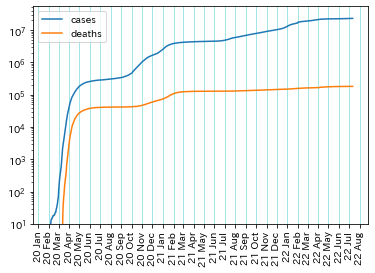

In [ ]:
# 累積症例数および死亡数を折れ線グラフでプロット
plt.plot(cases, label="cases")
plt.plot(deaths, label="deaths")
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

#
# x軸の目盛りの見栄えを修正する関数を定義する（国内データの描画で用いたものと同じ）
#
def fancy_ax(ax):
    ax = plt.gca() # 現在表示されているグラフのx/y軸を取得
    ## x軸の目盛を修正
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)
    return ax

ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
plt.legend(labels=["cases", "deaths"])
plt.show()

毎日の新規症例数と死亡者数もプロットしてみよう．以下では，[`fill_between`関数](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html)を用いて，日次症例数/死亡数を描画している．

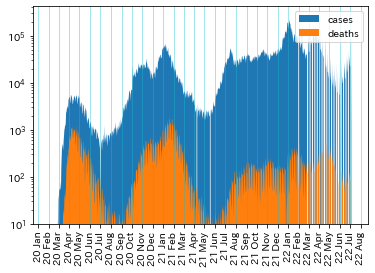

In [ ]:
# 日次症例数および死亡数を棒グラフでプロット
plt.fill_between(daily_cases.index, daily_cases, label="cases")
plt.fill_between(daily_deaths.index, daily_deaths, label="deaths")
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
plt.legend(labels=["cases", "deaths"])
plt.show()

国内データと同様，日次データは変動が大きい上，曜日の影響を受けやすい（土日は検査がないので報告症例数が小さくなりがち）ので，7日間の移動平均をとったものの方が使い勝手がよいかもしれない．移動平均は [`rolling`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)と[`mean`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)を使うと簡単に求められる．ここも「習うより慣れろ」で使ってみよう．

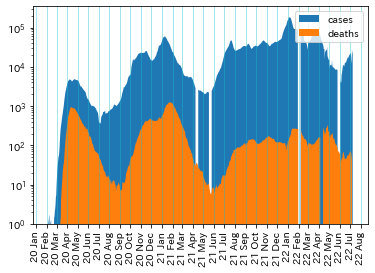

In [ ]:
# 日次症例数および死亡数の7日間移動平均を棒グラフでプロット
tw = 7 # 移動平均を求める期間の長さ
plt.fill_between(daily_cases.index, daily_cases.rolling(tw).mean(), label="cases")
plt.fill_between(daily_deaths.index, daily_deaths.rolling(tw).mean(), label="deaths")
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
plt.legend(labels=["cases", "deaths"])
plt.show()

累積曲線と日次データをまとめてプロットしてみよう．以下は，`country` という変数に代入された国名に対応する症例数と死亡数を，それぞれ，累積件数と日次新規件数でプロットする．
国内データと異なるのは，累積件数と新規件数を同じy軸で表示している点だ．

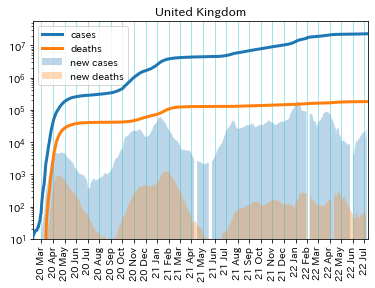

In [ ]:
country = "United Kingdom" # プロットしたい国名を代入
window = 7 # 移動平均を求める期間の長さ

ctry_df = global_df.loc[country] # 当該国のデータフレーム
cases = ctry_df["total_cases"] # 累積症例数
deaths = ctry_df["total_deaths"] # 累積死亡数
daily_cases = ctry_df["new_cases"] # 新規症例数
daily_deaths = ctry_df["new_deaths"] # 新規死亡数

# x軸の表示範囲を適切にするために，累積症例数が10を超えた最初の日を記録しておく
xmin = cases[cases>10].index[0]
xmax = cases.index[-1]

# 累積症例数/死亡者数
plt.plot(cases, label="cases",linewidth=3, zorder=10)
plt.plot(deaths, label="deaths",linewidth=3, zorder=10)

# 日次症例数/死亡者数（alpha=0.3として半透過させている）
plt.fill_between(daily_cases.index, daily_cases.rolling(window).mean(), label="new cases", alpha=0.3, zorder=1)
plt.fill_between(daily_deaths.index, daily_deaths.rolling(window).mean(), label="new deaths", alpha=0.3, zorder=2)
# 片対数グラフにする
plt.yscale('log')
plt.ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

# 軸の見栄えを整える
ax = fancy_ax(plt.gca()) # x軸の見栄えを整える
ax.legend(loc='upper left')
plt.xlim((xmin,xmax))
plt.title(country)

# 国の名前を付けてグラフを保存する
plt.savefig("cases_deaths-%s.pdf" % country) 
plt.show()


# 死亡数が多い国の感染状況を可視化する
## 死亡数の多い国を探す
死亡者数の多い国を調べるには，以下の手順を行えばよい：
1. データフレームの累積死亡者数を国別にグループ化し，それぞれのグループの最後の要素（最新の累積死亡者数）を取り出す
2. 世界全体の累積死亡者数を表す行（"World"というインデックスがついている）を取り除く
3. [`sort_values`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)に `ascending=False` オプション引数を与え，大きい方から順（descending order）に並べ替える
4. [`head`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)を使って上位の要素を取り出す

この手続きは，以下のセルのように実装される：

In [55]:
# 世界全体(World), 地域(Asia, Europe), 所得(High Income/)などをとりのぞいた，純粋な国別データを global_ctry_df というデータフレームに取得
global_ctry_df = global_df[~global_df.iso_code.str.contains("OWID")]

In [57]:
rank = 30 # 上位何位までを表示するか
top_deaths = global_ctry_df["total_deaths"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths = top_deaths.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す
top_deaths

location
United States     1021306.0
Brazil             673758.0
India              525474.0
Russia             373896.0
Mexico             326097.0
Peru               213695.0
United Kingdom     180898.0
Italy              169233.0
Indonesia          156798.0
France             150248.0
Germany            142035.0
Iran               141444.0
Colombia           140202.0
Argentina          129145.0
Ukraine            117167.0
Poland             116453.0
Spain              108730.0
South Africa       101880.0
Turkey              99057.0
Romania             65788.0
Philippines         60640.0
Chile               58860.0
Hungary             46661.0
Vietnam             43089.0
Canada              42215.0
Czechia             40334.0
Bulgaria            37277.0
Malaysia            35816.0
Ecuador             35755.0
Belgium             32015.0
Name: total_deaths, dtype: float64

## 人口あたり死亡数の多い国を探す
同じことを，`"total_death_per_million"`という列に対して行うと，人口あたりの死亡者数が大きい順に取り出せる．

In [58]:
rank = 30 # 上位何位までを表示するか
top_deaths_pm = global_ctry_df["total_deaths_per_million"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths_pm = top_deaths_pm.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す
top_deaths_pm

location
Peru                      6338.188
Bulgaria                  5413.551
Bosnia and Herzegovina    4833.469
Hungary                   4805.564
Georgia                   4482.195
North Macedonia           4438.200
Montenegro                4346.517
Croatia                   3969.819
Czechia                   3837.405
Moldova                   3779.186
Slovakia                  3700.697
San Marino                3437.444
Romania                   3403.668
Lithuania                 3294.636
Gibraltar                 3213.958
Brazil                    3143.610
Slovenia                  3142.384
Latvia                    3133.006
Armenia                   3091.752
Poland                    3039.935
United States             3030.603
Chile                     3019.517
Greece                    2917.658
Italy                     2856.719
Argentina                 2852.345
Paraguay                  2839.584
Belgium                   2757.199
Colombia                  2721.494
Ukraine    

## 「死亡数」と「人口あたり死亡数」のどちらも多い国について，散布図をプロットする
「死亡数」と「人口あたり死亡数」のどちらでも上位に入っている国（2つのデータフレームのインデックスの共通部分）は，[`pandas.Index.intersecton`関数](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.intersection.html)を使って，
```python
country_set = top_deaths.index.intersection(top_deaths_pm.index)
```
とすることで求められる．

                   deaths  deaths per mil.
location                                  
United States   1021306.0         3030.603
Brazil           673758.0         3143.610
Peru             213695.0         6338.188
United Kingdom   180898.0         2688.692
Italy            169233.0         2856.719
Colombia         140202.0         2721.494
Argentina        129145.0         2852.345
Ukraine          117167.0         2691.550
Poland           116453.0         3039.935
Romania           65788.0         3403.668
Chile             58860.0         3019.517
Hungary           46661.0         4805.564
Czechia           40334.0         3837.405
Bulgaria          37277.0         5413.551
Belgium           32015.0         2757.199


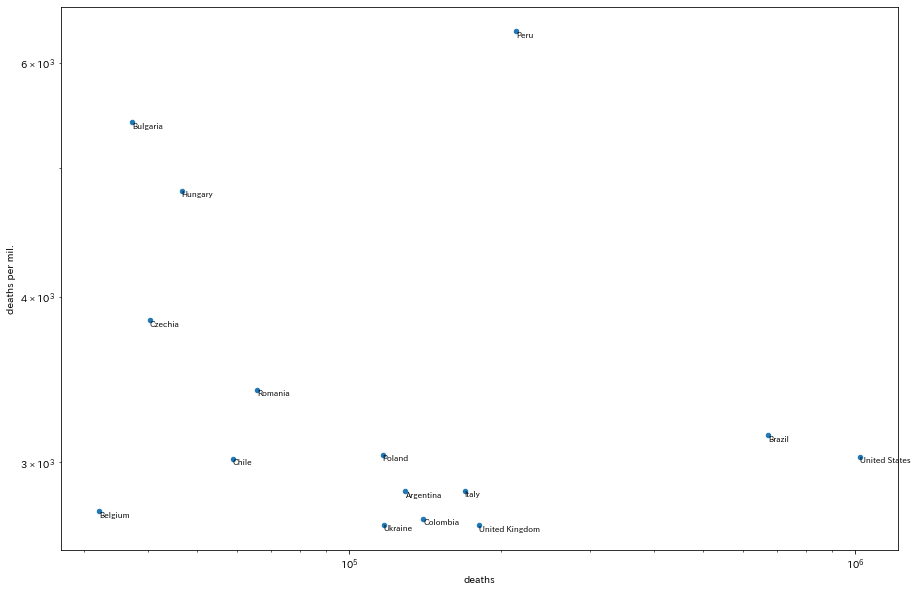

In [61]:
# 「死亡数」と「人口あたり死亡数」のどちらでも上位に入っている国
country_set = top_deaths.index.intersection(top_deaths_pm.index)
#country_set = country_set.union({'World', 'Japan'})  # 世界全体と日本を加える

# country_set に含まれる国の「死亡数」と「人口あたり死亡数」を取得し直し，dfというデータフレームに格納する
df = global_ctry_df[["total_deaths","total_deaths_per_million"]].groupby("location").last()
df.columns = ["deaths", "deaths per mil."]
df = df[df.index.isin(country_set)]
print(df.sort_values("deaths", ascending=False)) # 対象となる国を死亡数の多い順に並べ替えて表示

# 散布図をプロットする
ax = df.plot.scatter("deaths", "deaths per mil.", figsize=(15,10))
ax.set_xscale('log')
ax.set_yscale('log')
for country in country_set:
    tmp_df = df.loc[country]
    ax.annotate(country, color="black", xy=(df.loc[country]["deaths"], df.loc[country]["deaths per mil."]), size=8, ha='left', va='top')

## 複数の国の感染状況を1枚の図にプロットする
国内の場合と同様に，`for`による繰り返しと`subplot`を活用することで，複数の国の感染状況をまとめて一枚の図に表示できる．

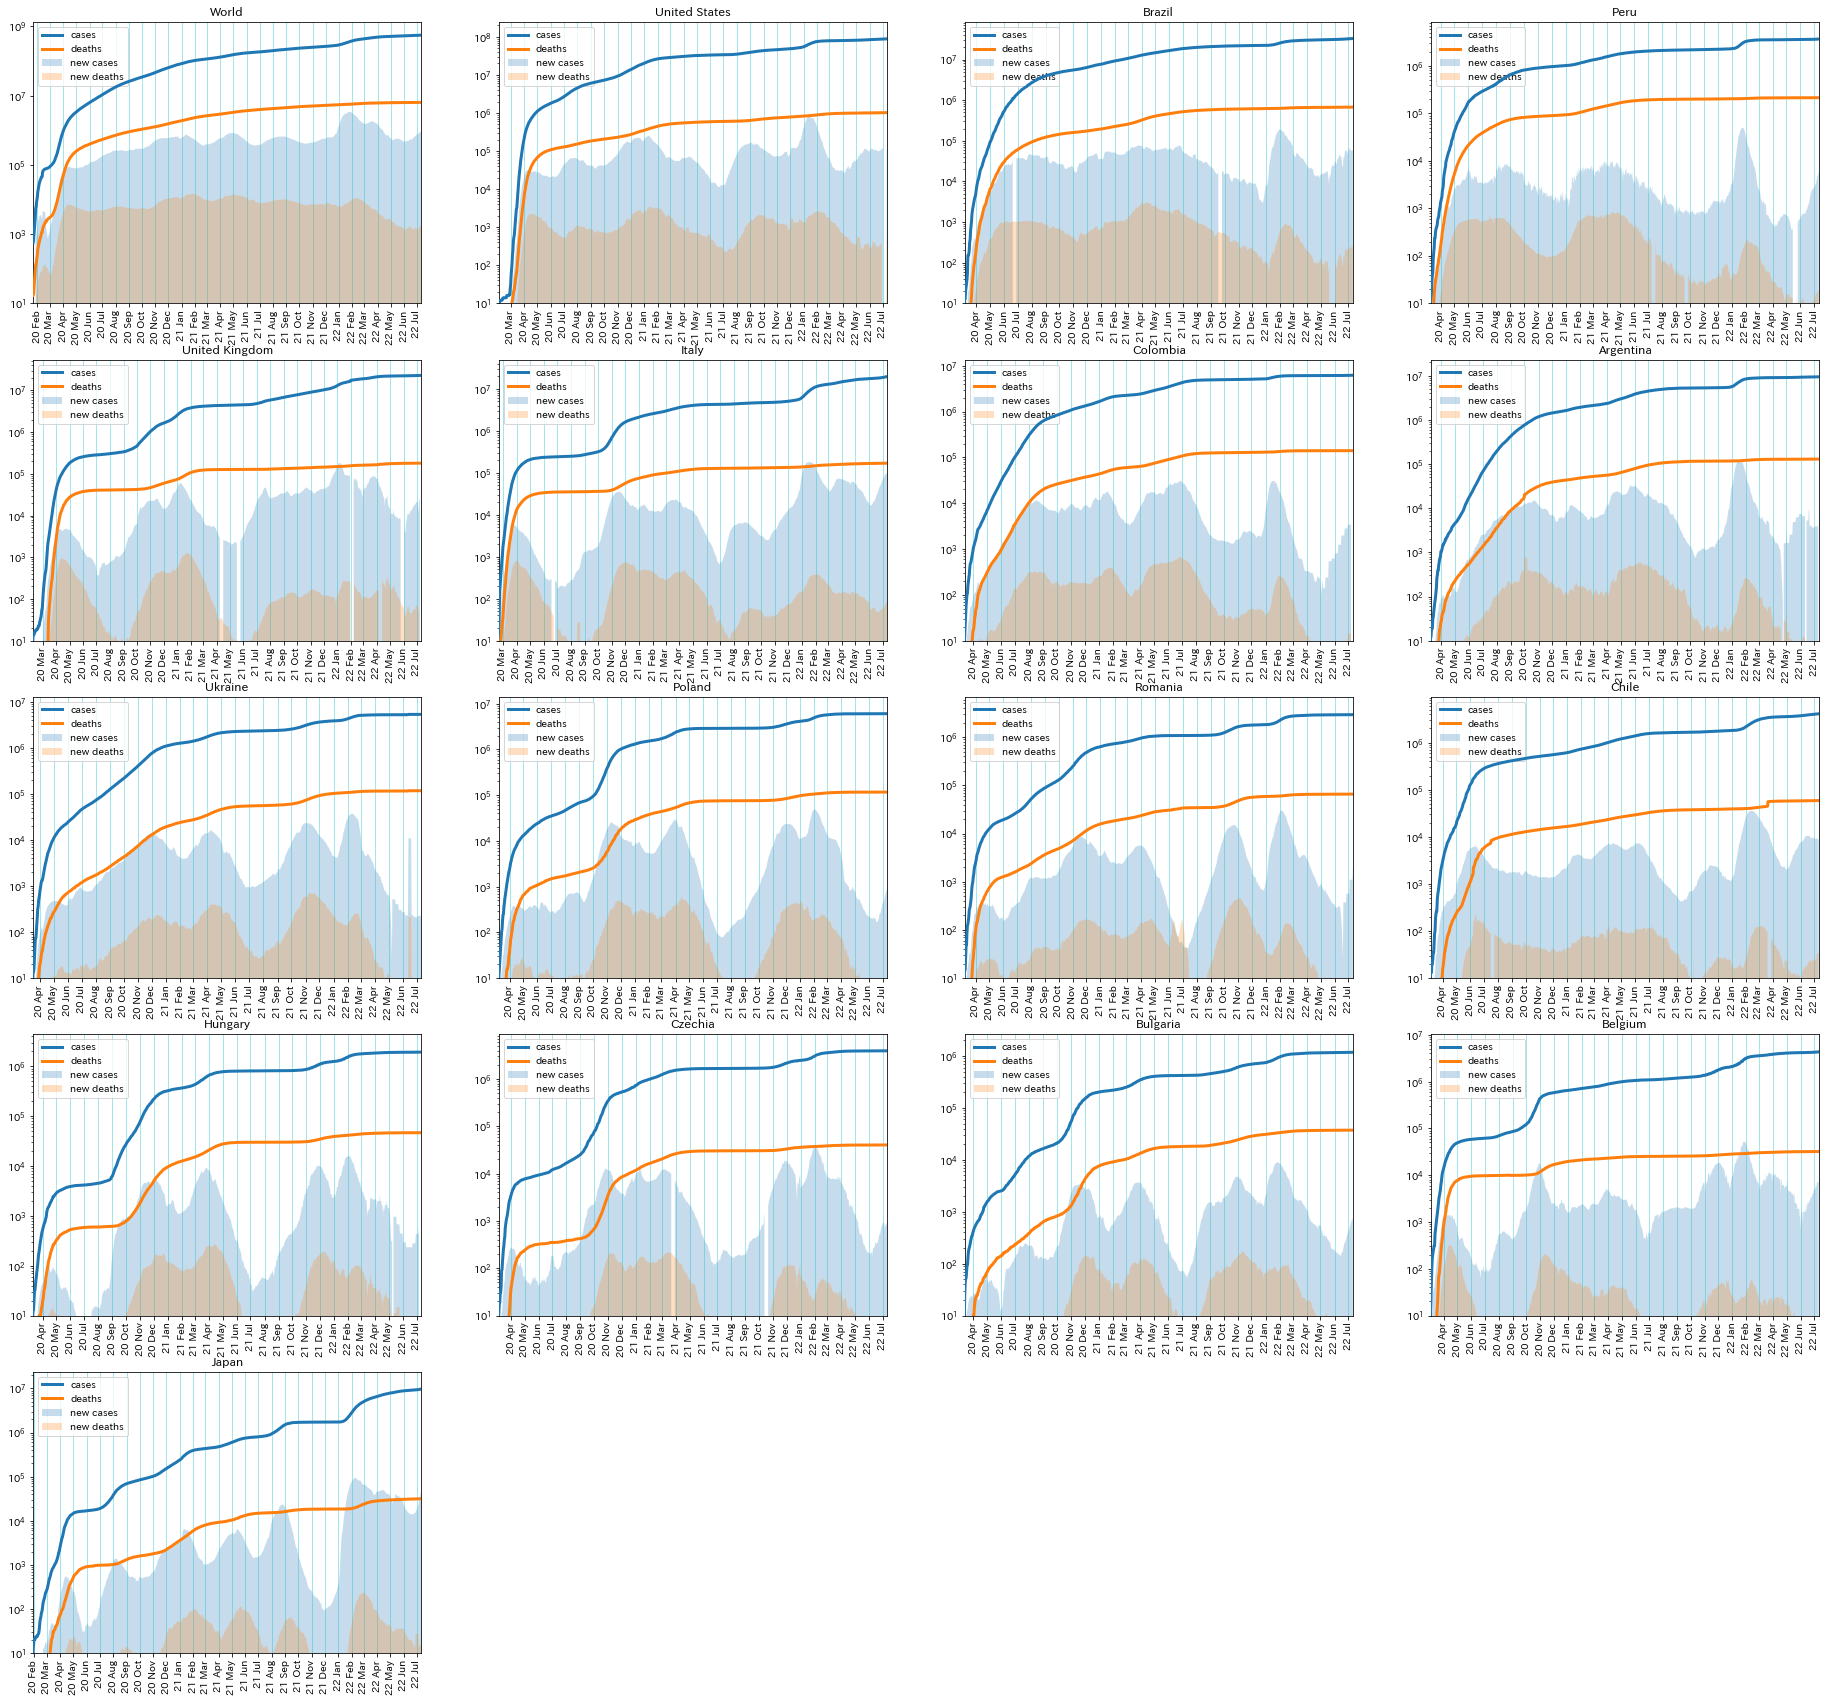

In [62]:
#
# 「死亡数」と「人口あたり死亡数」のどちらも多い国を抽出する
#

rank = 30 # 上位何位までを表示するか
# 死亡数の多い国
top_deaths = global_ctry_df["total_deaths"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths = top_deaths.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す
# 人口あたり死亡数の多い国
top_deaths_pm = global_ctry_df["total_deaths_per_million"].groupby("location").last() # global_dfの累積死亡者数を国別にグループ化し，各グループの最後の要素を取り出す
top_deaths_pm = top_deaths_pm.sort_values(ascending=False).head(rank) # 残った要素を降順に並べ替え，rank 個の上位要素を取り出す

# 「死亡数」と「人口あたり死亡数」のどちらでも上位に入っている国を抽出する
country_set = top_deaths.index.intersection(top_deaths_pm.index)
# 世界全体('World')と日本('Japan')を country_set に（含まれていなければ）追加する
country_set = country_set.union({'World', 'Japan'}) 

# country_set に含まれる国のデータだけでデータフレームを構築し，top_dfに格納する
top_df = global_df[global_df.index.get_level_values("location").isin(country_set)]
# country_set を「死亡数」の多い順に並べ替える
country_set = top_df["total_deaths"].groupby("location").last().sort_values(ascending = False).index
# country_set = ["Japan", "United States", "United Kingdom"] # 自分で選んだ国についてプロットする場合は，この行の行頭のコメントを外し，国名を修正する

#
# グラフ描画
#
cols = 4 # 1行に表示するタイルの数（列数）
rows = np.ceil(len(country_set)/cols) # タイルの行数
fig = plt.figure(figsize=(8*cols, 6*rows))

for (cid, country) in enumerate(country_set):
    window = 7 # 移動平均を求める期間の長さ
    ctry_df = top_df.loc[country] # 当該国のデータフレーム
    cases = ctry_df["total_cases"] # 累積症例数
    deaths = ctry_df["total_deaths"] # 累積死亡数
    daily_cases = ctry_df["new_cases"] # 新規症例数
    daily_deaths = ctry_df["new_deaths"] # 新規死亡数

    # add_subplot を使って複数の図をタイル状に配置
    ax = fig.add_subplot(rows, cols, cid+1)
    
    # x軸の表示範囲を適切にするために，累積症例数が10を超えた最初の日を記録しておく
    xmin = cases[cases>10].index[0]
    xmax = cases.index[-1]

    # 累積症例数/死亡者数
    ax.plot(cases, label="cases",linewidth=3, zorder=10)
    ax.plot(deaths, label="deaths",linewidth=3, zorder=10)

    # 日次症例数/死亡者数（alpha=0.5として半透過させている）
    ax.fill_between(daily_cases.index, daily_cases.rolling(window).mean(), label="new cases", alpha=0.25, zorder=1)
    ax.fill_between(daily_deaths.index, daily_deaths.rolling(window).mean(), label="new deaths", alpha=0.25, zorder=2)
    # 片対数グラフにする
    ax.set_yscale('log')
    ax.set_ylim(10,) # 片対数グラフだとスケール感がわかりにくくなるので，y軸の下限値を10にする

    # 軸の見栄えを整える
    ax = fancy_ax(ax) # x軸の見栄えを整える
    ax.legend(loc='upper left')
    ax.set_xlim((xmin,xmax))
    ax.set_title(country)

plt.show()

# エリアごとに感染死亡率をプロットしてみる．
Our World in Data のデータには，国別のデータだけでなく，下記のような地域のデータもある．
- 地理的地域: ```['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America', 'World']```
- 所得層別地域：```['Low income', 'Lower middle income', 'Upper middle income', 'High income']```

これらの地域についてのデータは, `iso_code` の列に "OWID" が含まれているので，これを抽出することで，地域別データのみが含まれたデータフレームを構築できる．

In [192]:
# global_dfに対して iso_code の列に "OWID" が含まれたものだけを取り出し, area_df とする
area_df = global_df[global_df.iso_code.str.contains("OWID")]
# area_df に含まれる国・地方名を表示させる
print( area_df.index.get_level_values("location").unique() )

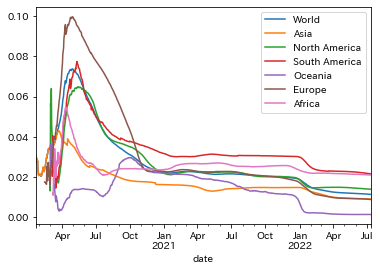

In [199]:
# 感染死亡率 = 累積死亡者数/累積感染者数を求める
cfr = ( global_df.total_deaths/global_df.total_cases )
# 地域のリストを与える
ar_list = ["World", "Asia", "North America", "South America", "Oceania", "Europe", "Africa"]
# リスト内の各地域について，感染死亡率の推移をプロットする
for ar in ar_list:
    cfr.loc[ar].plot(label=ar)
plt.legend()

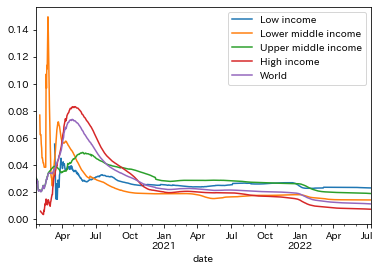

In [201]:
# 地域のリストを与える
ar_list =['Low income', 'Lower middle income', 'Upper middle income', 'High income', 'World']
# リスト内の各地域について，感染死亡率の推移をプロットする
for ar in ar_list:
    cfr.loc[ar].plot(label=ar)
plt.legend()